# Комп’ютерний практикум № 4 з дисципліни «Аналіз даних в інформаційних системах» на тему: «Вивідна статистика».

### Мета роботи: ознайомитись з
- методами визначення точкових оцінок параметрів розподілу; дослідити, що впливає на якість точкових оцінок;
- методикою визначення інтервальних оцінок параметрів розподілу; дослідити, що впливає на якість інтервальних оцінок;
- методами перевірки статистичних гіпотез про вигляд закону розподілу; дослідити, що впливає на ширину критичної області.
### Основне завдання:
- Скачати дані файлу Data2.csv.
- Подивитись, проаналізувати структуру.
- Вказати, чи є параметри, що розподілені за нормальним законом.
- Перевірити середні та медіани на значимість.
- Вказати, в якому регіоні розподіл викидів СО2 найбільш близький до нормального.
- Побудувати кругову діаграму населення по регіонам.
## Виконав: студент ІП-13 Бабашев О. Д.
## Перевірила: Ліхоузова Т. А.

### 1) Завантажено дані та проаналізовано структуру:

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
df = pd.read_csv('Data2.csv', sep = ';', encoding='cp1251', decimal=',')
#if no decimal parametr in read_csv
#df['GDP per capita'] = df['GDP per capita'].str.replace(',','.').astype(float)
#df['CO2 emission'] = df['CO2 emission'].str.replace(',', '.').astype(float)
#df['Area'] = df['Area'].str.replace(',', '.').astype(float)
df = df.rename(columns={'Populatiion':'Population'})
#df.isna().any() there are na values
#df.describe() there are <0 values
for column in df.columns:
    if df[column].dtype == float or df[column].dtype == int:
        df[column] = df[column].abs()
for column in df.columns:
    if df[column].isna().any():
        df[column].fillna(df[column].mean(), inplace = True)
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,13445.593416,102951.0,165114.116337,350.0
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,165114.116337,6020.0
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730000,527970.0
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076000,752610.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  217 non-null    float64
 3   Population      217 non-null    float64
 4   CO2 emission    217 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


In [110]:
df.describe()

,GDP per capita,Population,CO2 emission,Area
count,217.000000,2.170000e+02,2.170000e+02,2.170000e+02
mean,13445.593416,3.432256e+07,1.651141e+05,6.188441e+05
std,16873.922101,1.344477e+08,8.100511e+05,1.827830e+06
min,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,2361.160205,7.956010e+05,1.954511e+03,1.088700e+04
50%,7179.340661,6.293253e+06,1.156205e+04,9.303000e+04
75%,14428.140260,2.369592e+07,8.256251e+04,4.474200e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


### 2) Перевірено на нормальність розподілу кожен числовий стовпець. За нульову гіпотезу взято факт нормальності розподілу. При значенні p<alpha(0.05) гіпотезу буде відхилено.

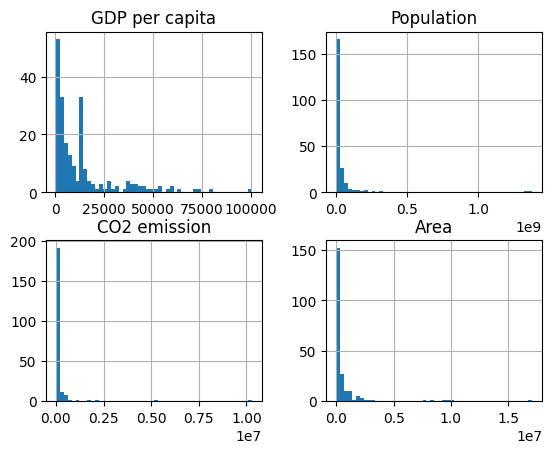

In [111]:
#draw hists for every numeric column
df.hist(bins = 50)
plt.show()

#### При наявності параметрів розподілених за нормальним законом гістограма розподілу буде мати вигляд двона. Подібної ознаки на гістограмах не виявлено. Після візуальної оцінки проведемо аналіз за допомогою функції normaltest з бібліотеки scipy.

In [112]:
for column in df.columns:
    if df[column].dtype == float or df[column].dtype == int:
        stat, p = stats.normaltest(df[column])
        print(f"{column}:\nStatistic value = {stat.round(2)}\nP value = {p}")
        alpha = 0.05
        if p < alpha:#Reject the null hypothesis
            print(f"does not follow a normal distribution\n")
        else:
            print(f"follows a normal distribution\n")

GDP per capita:
Statistic value = 110.28
P value = 1.1311967190225328e-24
does not follow a normal distribution

Population:
Statistic value = 370.21
P value = 4.0649500975214068e-81
does not follow a normal distribution

CO2 emission:
Statistic value = 406.22
P value = 6.178135959176474e-89
does not follow a normal distribution

Area:
Statistic value = 284.7
P value = 1.5098606701471349e-62
does not follow a normal distribution



#### Колонок розподілених за нормальним законом не виявлено.
### 3) Перевірено середні та медіани на значимість(чи є середнє та медіанне значення статистично значущими, тобто чи достатньо вони різняться).
#### За середнє значення сукупності, з якої взята вибірка, за умовою береться її медіана. Визначено за нульову гіпотезу факт рівності середнього та медіани одного з розподілів. При значенні p<alpha гіпотеза буде відхилена і це буде означати, що середнє та медіана стотистично значимі(тобто достатньо відрізняються). Перевірка середнього та медіани на значущість означає визначення, чи є середнє та медіана статистично різними і чи досить різницю між ними значущі. Це може показати, як сильно відхиляються значення у вибірці від центральних значень. Якщо різниця між середнім і медіаною є статистично значущою, це може вказувати на наявність викидів у даних або на неоднорідність розподілу. Якщо p-значення менше рівня значущості (зазвичай 0.05), то нульова гіпотеза (що середнє і медіані) відкидається, що говорить про значущість відмінності між середнім і медіаною у вибірці.

In [113]:
#The ttest_ind function is used to test the null hypothesis that two independent samples have identical average (expected) values. It takes two arrays as input, which are assumed to be independent samples from two different populations, and calculates the t-statistic and p-value for the difference between the means of the two samples.

#On the other hand, the ttest_1samp function is used to test the null hypothesis that a single sample comes from a population with a specific mean. It takes one array as input and the mean of the population from which the sample is drawn, and calculates the t-statistic and p-value for the difference between the sample mean and the population mean.
for column in df.columns:
    if df[column].dtype == float or df[column].dtype == int:
        stat, p  = stats.ttest_1samp(df[column], df[column].median())
        alpha = 0.05
        if p < alpha:#Reject the null hypothesis
            print(f"{column}:\nmean and median ARE NOT equal in this distribution. so mean and median ARE significant. \n")
        else:
            print(f"{column}:\nmean and median ARE equal in this distribution. so mean and median ARE NOT significant.\n")

GDP per capita:
mean and median ARE NOT equal in this distribution. so mean and median ARE significant. 

Population:
mean and median ARE NOT equal in this distribution. so mean and median ARE significant. 

CO2 emission:
mean and median ARE NOT equal in this distribution. so mean and median ARE significant. 

Area:
mean and median ARE NOT equal in this distribution. so mean and median ARE significant. 



### 4) Вказано, в якому регіоні розподіл викидів СО2 найбільш близький до нормального.

In [133]:
normal_values = []
for region,emission in df.groupby(['Region'],as_index=False)['CO2 emission']:
    stat,p = stats.shapiro(emission)
    normal_value = (region, p)
    normal_values.append(normal_value)
#p value is the closest to normal(when it is the highest)
normal_values = sorted(normal_values, key=lambda x:x[1],reverse=True)
print(normal_values)
print(f"In {normal_values[0][0]} distribution CO2 emission is the closest to normal.")

[('North America', 0.17751772701740265), ('Middle East & North Africa', 1.0225892765447497e-05), ('South Asia', 4.837930646317545e-06), ('Latin America & Caribbean', 2.83462864292261e-10), ('East Asia & Pacific', 1.0137837834836572e-12), ('Europe & Central Asia', 3.7022774711410744e-13), ('Sub-Saharan Africa', 1.385663315995678e-14)]
North America


#### (АЛЕ) Маємо тільки 3 варіанти у вибірці North America, тому на основі проведеного аналізу не можна робити висновок про нормальність данної віибірки.

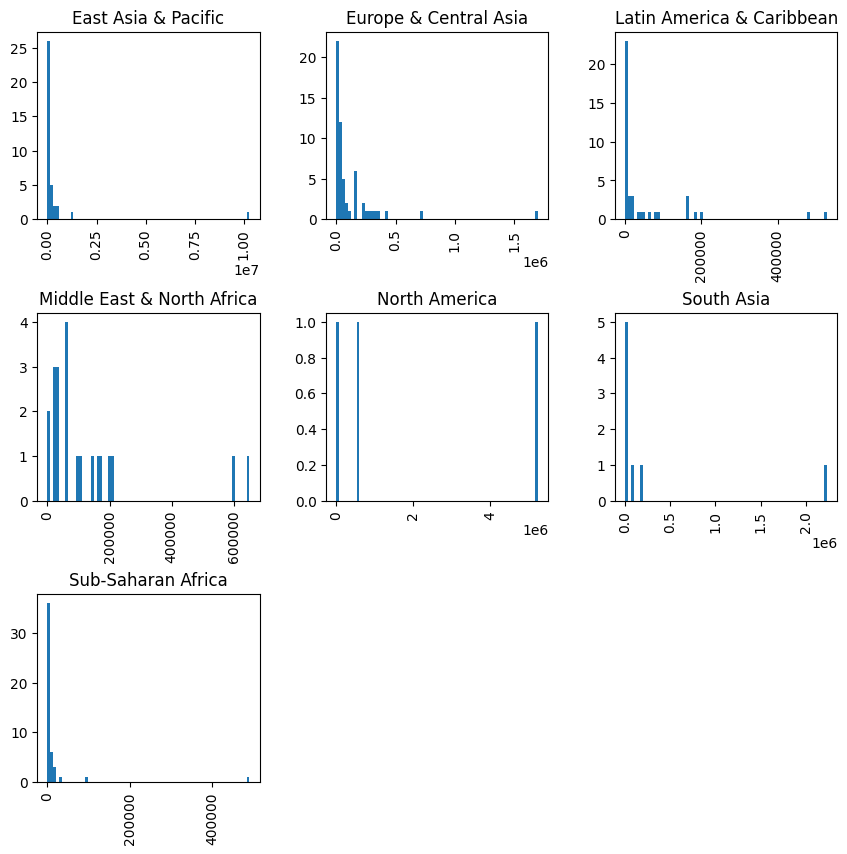

In [114]:
df['CO2 emission'].hist(by=df['Region'],bins=70, figsize=[10, 10])
plt.show()

### 5) Побудовано кругову діаграму населення по регіонам.

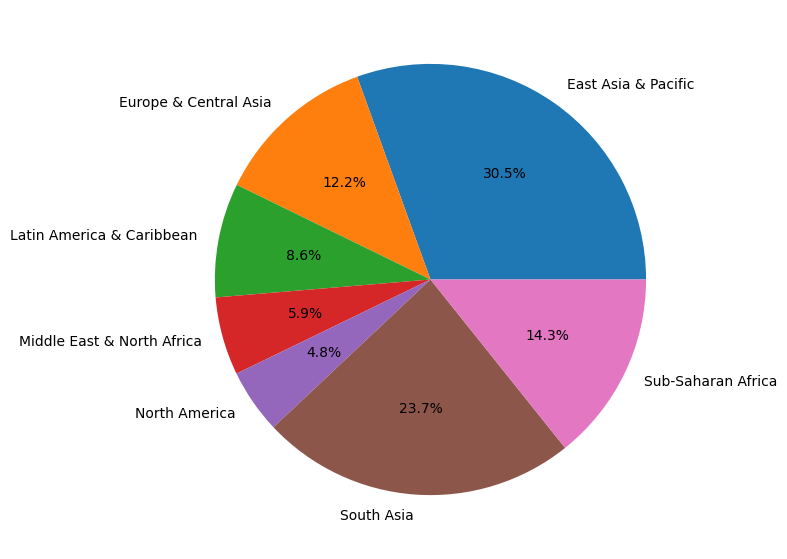

In [144]:
df.groupby('Region')['Population'].sum().plot(kind="pie", autopct='%1.1f%%',figsize = (15,7))
plt.ylabel(None)
plt.show()